# Exercise 0 - Ordinary Least Squares (25 Points)

The first exercise is about linear models.
The given data set contains prices and other attributes of approximately 54,000 diamonds. You should fit a linear model to predict the price of a diamond, given its attributes.

This exercise is meant to get you started with the tool stack. We use the following python packages:
- pandas (https://pandas.pydata.org/)
- numpy (http://www.numpy.org/)
- matplotlib (https://www.matplotlib.org) and seaborn (https://seaborn.pydata.org)
- sklearn (http://scikit-learn.org/)

If you are unfamiliar with them, follow the documentation links. In the (unlikely) event of a persistent problem, do not hesitate to contact the course instructors.

### Submission

- Deadline of submission:
        x.y.z
- Mail your solution notebook or a link to your gitlab repository to:
        paul.kahlmeyer@uni-jena.de

### Diamonds Dataset 

- price: price in US dollars (326.0 - 18823.0)
- carat: weight of the diamond (0.2 - 5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)


### Task 1 (1 Point)
Import the data from the file and examine it.

Determine the following:

* The number of data points. (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [1]:
import pandas as pd
import numpy as np

# TODO: load data
data = pd.read_csv('diamonds.csv')

# TODO: determine number of datapoints
n_data = data.shape[0]
print(f'Number of datapoints: {data.shape[0]}')

# TODO: determine column names
col_names = list(data.keys())
print(f'Column names: {col_names}')

# TODO: determine datatypes of columns
dtypes = data.dtypes
print(f'Datatypes:\n{dtypes}')

Number of datapoints: 53940
Column names: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Datatypes:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


### Task 2 (2 Points)

Since there are discrete variables and we do not yet know how to include them into our regression model, remove them. Additionally, verify that there are no missing values in our dataset.

Hint: there are multiple ways to [check](https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345) for missing values

In [2]:
# TODO: remove discrete variables (1 Point)
data = data.drop(columns=['cut', 'color', 'clarity'])

# TODO: check for missing values (1 Point)
assert not np.isnan(data.values).any()

Visualizing correlation in your data often helps to build intuition and get a feeling of the deeper mojo in the set.

Here we want to use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a measure for correlation between two variables.

Let $x$ and $y$ be two variables of our dataset (e.g. `carat` and `price`). The empirical Pearson correlation coefficient between $x$ and $y$ is defined as 

\begin{align}
r_{xy} = \cfrac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}\,,
\end{align}
where $\bar{x}$ and $\bar{y}$ are the respective empirical means.

### Task 3 (5 Points)

Implement a function `pearson_corr`, that takes two vectors $[x_i]_{i=1,\dots n}, [y_i]_{i=1,\dots n}$ as well as $\bar{x}$ and $\bar{y}$ and computes $r_{xy}$. Use this function to calculate the pairwise correlation matrix for our dataset. Visualize this correlation matrix and label the rows/columns.

Text(0.5, 1.0, 'Correlation matrix')

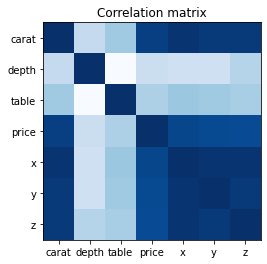

In [3]:
import matplotlib.pyplot as plt

def pearson_corr(x, y, x_bar, y_bar):
    # TODO: calculate correlation coefficient (1 Point)
    tmp1 = np.sum((x-x_bar)*(y-y_bar))
    tmp2 = np.sqrt(np.sum((x-x_bar)**2)) * np.sqrt(np.sum((y-y_bar)**2))
    return tmp1/tmp2

# TODO: calculate pairwise correlation matrix (2 Points)
# calculate means: 1 Point
# use pearson_corr: 1 Point
values = data.to_numpy()
means = np.mean(values, axis=0)
centered_values = values-means
d = values.shape[1]

corr_matrix = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        corr_matrix[i,j] = pearson_corr(values[:,i], values[:,j], means[i], means[j])


# TODO: visualize matrix and label the rows/columns (2 Points)
# plot corr matrix: 1 Point
# set labels: 1 Point
plt.imshow(corr_matrix, cmap='Blues')
plt.xticks(np.arange(d), labels = data.keys())
plt.yticks(np.arange(d), labels = data.keys())
plt.title('Correlation matrix')

### Task 4 (1 Point)
Make a scatter plot of `carat` vs `price` using Matplotlib. Label the axes and give the plot a title.

Text(0.5, 1.0, 'Carat vs. Price')

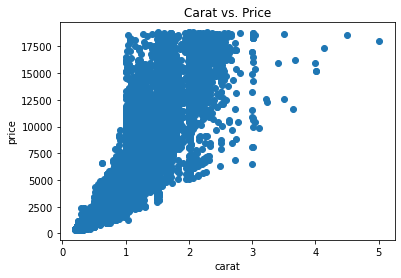

In [4]:
# TODO: display data in scatter plot + label axes + set title
carats = data['carat']
prices = data['price']
plt.scatter(carats, prices)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Carat vs. Price')

### Task 5 (5 Points)
Fit a linear model by using maximum likelihood estimation (cf. The Lecture). Here we want to predict the `price` of a diamond from the variable `carat` by implementing the OLS method by yourself.

- Build the design matrix $\mathbb{X}$ and the vector of the dependent variable $Y$.
- Estimate the parameter vector $\theta$
- Make a scatter plot of `carat` vs `price` and include the regression line

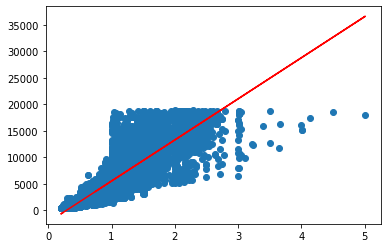

In [5]:
# TODO: build X, y (1 Point)
X = np.stack([np.ones(carats.shape[0]),carats])
y = np.array(prices)

# TODO: estimate theta (2 Points)
# correct Formula: 1 Point
# linalg.solve instead of inverse: 1 Point
theta = np.linalg.solve((X @ X.T), X @ y)

# TODO: plot data + regression line (2 Points)
# predict values for regression line: 1 Point
# scatter plot + line: 1 Point
preds = theta @ X 
plt.scatter(carats, prices)
plt.plot(carats, preds, color='red')

### Task 6 (2 Points)

You can find an implementation of this method in the python module scikit-learn. Use it and compare your result.

In [6]:
# TODO: use scikit learn to estimate theta (1 Point)
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(X.T, y)

# TODO: compare results (1 Point)
assert np.all(np.isclose(theta, reg.coef_))

### Task 7 (5 Points)

Build a model to predict the `price` from the variables `carat`, `depth`, `table`, `x`, `y`, `z`.

- Build the design matrix
- Estimate the parameter vector $\theta$
- Compare your results with the result that the `LinearRegression` module from scikit-learn gives you.

In [7]:
# TODO: build X, y (2 Points)
# get correct variables: 1 Point
# transpose and concat with 1-vector: 1 Point
X = np.concatenate([np.ones((1, len(data))), data.drop(columns='price').values.T], axis=0)
y = np.array(prices)

# TODO: estimate theta (1 Point)
theta = np.linalg.solve((X @ X.T), X @ y)

# TODO: estimate theta using scikit-learn + compare (1 Point)
reg = LinearRegression(fit_intercept=False).fit(X.T, y)
theta, reg.coef_
assert np.all(np.isclose(theta, reg.coef_))

### Question 8 (4 Points)

The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (a.k.a. $R^2$) is the proportion of variation in the predictions $Y$, explained by the observations $\mathbb{X}$ that is commonly used to measure the Goodness-of-Fit of a linear model.

- Calculate the $R^2$ for you model.
- Is $R^2$ a good measure for the goodness-of-fit?
- What are its advantages?
- What are its limits?

In [8]:
# TODO: calculate R^2 (2 Points)
# correct formula: 1 Point
# correct result: 1 Point
preds = theta @ X
SS_tot = np.sum((y-np.mean(y))**2)
SS_res = np.sum((y-preds)**2)
R2 = 1-SS_res/SS_tot
print(f'R^2 Score: {R2}')

# TODO: strengths and weaknesses of R^2 (2 Points)
# Strengths: 1 Point
# Weaknesses: 1 Point

R^2 Score: 0.8592186831580985


$R^2$ is good for 
- Assessing the quality of fit with a linear regressor
- comparing different linear regressors

$R^2$ does not indicate whether:
- the independent variables are a cause of the changes in the dependent variable;
- omitted-variable bias exists;
- the correct regression was used;
- the most appropriate set of independent variables has been chosen;
- there is collinearity present in the data on the explanatory variables;
- the model might be improved by using transformed versions of the existing set of independent variables;
- there are enough data points to make a solid conclusion